In [ ]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# Equations of Motion and Numerical Integration

## Equations of Motion

Consider two point masses, $ \mathnormal{m_1} $ and $ \mathnormal{m_2} $
  
![two-body problem inertial frame](images/tbp_inertial_pointmasses.png)

$ \mathcal{F}_I $ is an inertial frame.  An inertial frame is a coordinate frame where Newton's Laws apply.

$ \vec{\mathbf{r}}_1 $ is the position vector of mass $ \mathnormal{m_1} $. 

$ \vec{\mathbf{r}}_2 $ is the position vector of mass $ \mathnormal{m_2} $. 

$ \vec{\mathbf{r}}_{21} $ is the position vector of mass $ \mathnormal{m_2} $ with relative to $ \mathnormal{m_1} $.
\begin{equation}
\vec{\mathbf{r}}_{21} = \vec{\mathbf{r}}_{2} - \vec{\mathbf{r}}_{1}
\end{equation}


The force exerted by each mass can be determined by Newton's law of gravitation.

The force $ \mathnormal{m_2} $ exerts on $ \mathnormal{m_1} $:
\begin{equation}
\vec{\mathbf{F}}_{12} = \frac{\mathnormal{G}\mathnormal{m_1}\mathnormal{m_2}}{|\vec{\mathbf{r}}_{21}|^3} \vec{\mathbf{r}}_{21}
\end{equation}

The force $ \mathnormal{m_1} $ exerts on $ \mathnormal{m_2} $:
\begin{equation}
\vec{\mathbf{F}}_{21} = - \frac{\mathnormal{G}\mathnormal{m_1}\mathnormal{m_2}}{|\vec{\mathbf{r}}_{21}|^3} \vec{\mathbf{r}}_{21}
\end{equation}

$\mathnormal{G}$ is Newton's universdal gravitational constant.  
\begin{equation}
\mathnormal{G} = 6.67 \times 10^{-11}  \mathrm{m}^3 / (\mathrm{kg} \cdot \mathrm{s}^2)
\end{equation}

Applying Newton's second law:

$ \mathnormal{m_1} $:  
\begin{equation}
\mathnormal{m_1} \ddot{\vec{\mathbf{r}}}_{1} = \vec{\mathbf{F}}_{12} = \frac{\mathnormal{G}\mathnormal{m_1}\mathnormal{m_2}}{|\vec{\mathbf{r}}_{21}|^3} \vec{\mathbf{r}}_{21}
\end{equation}

$ \mathnormal{m_2} $:
\begin{equation}
\mathnormal{m_2} \ddot{\vec{\mathbf{r}}}_{2} = \vec{\mathbf{F}}_{21} = - \frac{\mathnormal{G}\mathnormal{m_1}\mathnormal{m_2}}{|\vec{\mathbf{r}}_{21}|^3} \vec{\mathbf{r}}_{21}
\end{equation}

Yields:

\begin{equation}
\ddot{\vec{\mathbf{r}}}_{1} = \frac{\mathnormal{G}\mathnormal{m_2}}{|\vec{\mathbf{r}}_{21}|^3} \vec{\mathbf{r}}_{21}
\end{equation}
\begin{equation}
\ddot{\vec{\mathbf{r}}}_{2} = -\frac{\mathnormal{G}\mathnormal{m_1}}{|\vec{\mathbf{r}}_{21}|^3} \vec{\mathbf{r}}_{21}
\end{equation}

Taking the difference:
\begin{equation}
\ddot{\vec{\mathbf{r}}}_{21} = \ddot{\vec{\mathbf{r}}}_{2} - \ddot{\vec{\mathbf{r}}}_{1} = - \frac{\mathnormal{G}(\mathnormal{m_1}+\mathnormal{m_2})}{|\vec{\mathbf{r}}_{21}|^3} \vec{\mathbf{r}}_{21}
\end{equation}

If $ \mathnormal{m_2} \ll \mathnormal{m_1}$, such as a satellite orbiting the Earth, we can assume $ \mathnormal{m_1} + \mathnormal{m_2} \approx \mathnormal{m_1} $ and define $ \mu = \mathnormal{G}\mathnormal{m_1} $, where $ \mathnormal{m_1} $ is the primary body and $ \mathnormal{m_2} $ is the secondary body.

After dropping the subscripts, the relative equations of motion are:
\begin{equation}
\ddot{\vec{\mathbf{r}}} = - \frac{\mu}{|\vec{\mathbf{r}}|^3} \vec{\mathbf{r}}
\end{equation}

This is a nonlinear second-order differential equation that is only a function of $ \mathnormal{m_2} $'s position.

### Standard Gravitational Parameter

Earth, $ \oplus $:  
\begin{equation}
\mu_{\oplus} = 3.986 \times 10^{14}  \mathrm{m}^3 / \mathrm{s}^2 
\end{equation}

Sun, $ \odot $:  
\begin{equation}
\mu_{\odot} = 1.327 \times 10^{20}  \mathrm{m}^3 / \mathrm{s}^2 
\end{equation}


In [1]:
try:
    from modsim import *
except ImportError:
    !pip install modsimpy
    from modsim import *

In [2]:
import numpy as np

### How do we solve differential equations numerically?

#### Simple example of projectile motion

A lacrosse ball is thrown at an angle $ \theta $ to the horizontal at a speed of 40.23 m/s.  Determine the path of motion, trajectory, of the ball if $ \theta $ = 38.0 deg.

\begin{equation}
\vec{\mathbf{a}} = \ddot{\vec{\mathbf{r}}} = -9.8 \mathrm{m} / \mathrm{s}^2 \hat{\mathbf{j}}
\end{equation}


In [3]:
v_mag = 40.23   # m/s
theta = 38.0 * np.pi / 180  # convert degrees to radians, alternatively np.deg2rad(theta)
init = State(x=0, y=0, vx=v_mag * np.cos(theta), vy=v_mag * np.sin(theta))  # initial conditions

In [4]:
system = System(init=init,
                g=9.8,
                t_end=10)

`init` and `system` are container variables the hold the initial conditions and system parameters.

Create a function containing the equations of motion for a simple projectile.

In [5]:
def eom_projectile(t, state, system):
    x, y, vx, vy = state

    dxdt = vx
    dydt = vy
    d2xdt = 0.0
    d2ydt = -system.g

    return dxdt, dydt, d2xdt, d2ydt
    

In [6]:
# test the eom with the initial conditions
dxdt, dydt, d2xdt, d2ydt = eom_projectile(0.0, system.init, system)
dxdt, dydt, d2xdt, d2ydt

(31.701672617598422, 24.768061152351226, 0.0, -9.8)

In [7]:
results, details = run_solve_ivp(system, eom_projectile)
details.message

'The solver successfully reached the end of the integration interval.'

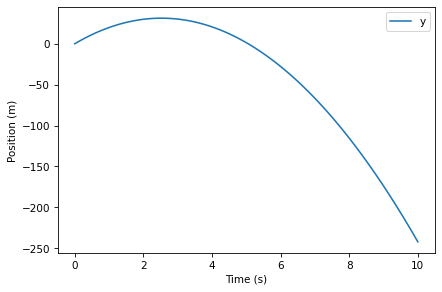

In [9]:
results.y.plot()

decorate(xlabel='Time (s)', ylabel='Position (m)')

In [ ]:
system = System(mu=3.986000e+14, dt=)

In [ ]:
# Write a function for the equations of motion
def eom_twobodies(t, state, system):
    x, y, z, v_x, v_y, v_z = state
    mu = system.mu

    r = np.sqrt( x**2 + y**2 + z**2 )
    x_dot = v_x
    y_dot = v_y
    z_dot = v_z
    x_dotdot = -mu / r**3 * x
    y_dotdot = -mu / r**3 * y
    z_dotdot = -mu / r**3 * z

    return 
    
    